# About Project

##  *Data sources*


1.   https://www.kiwi.com/en/   
2.   https://www.visionofhumanity.org/maps/#/

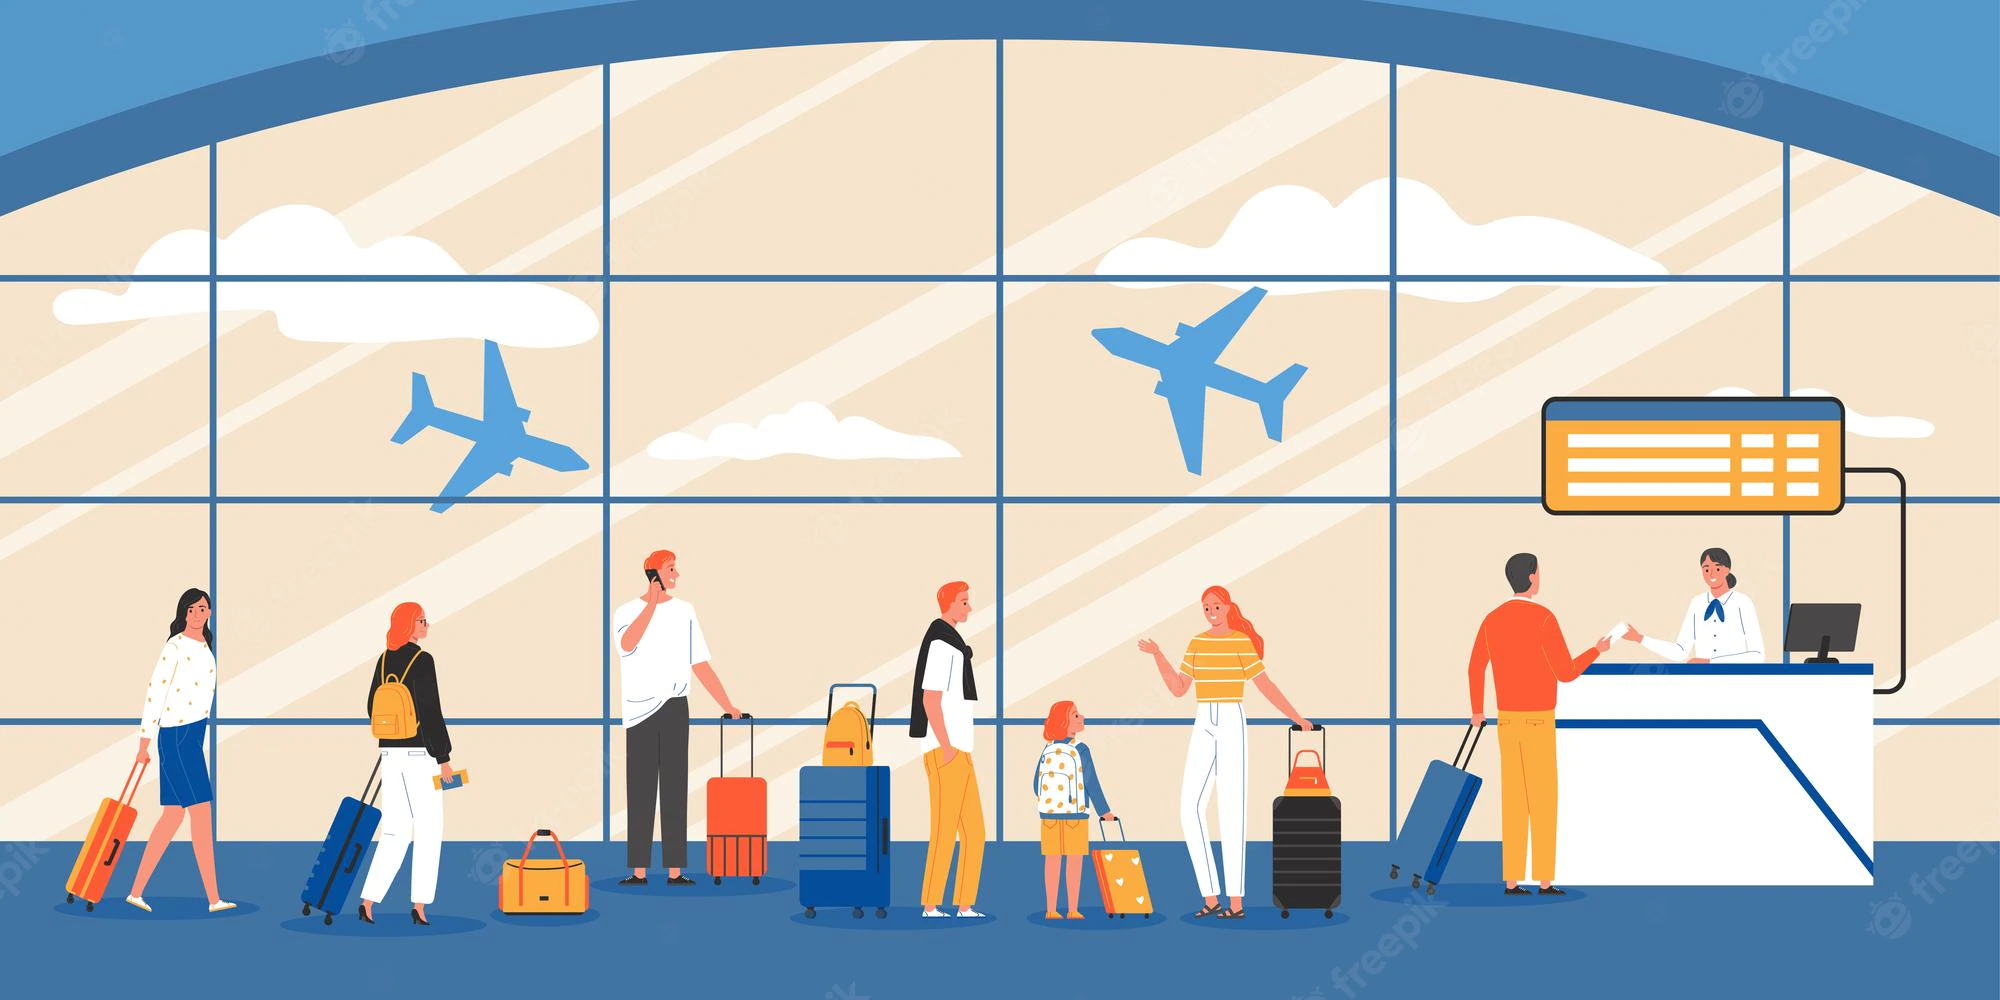

## **1.3 *The goal of the project***

<p align='justify'> Our objective is to deliver insightful and valuable information to the client by providing a comprehensive overview of the minimum flight prices for flights departing from Yerevan and arriving at arbitrary destinations during the months of January, February, and March 2023. By gathering this information, we aim to offer a clear understanding of the cost of flights during this time period, enabling the client to make informed travel decisions.

<p align='justify'> To further enhance the insights provided, we will incorporate the GPI (Global Peace Index) score of the countries of arrival for the flights departing from Yerevan during the specified months. The GPI score is a well-established index that ranks countries based on their level of peacefulness and is a useful indicator for travelers who prioritize safety and security.

<p align='justify'> Additionally, we will create visually appealing graphs to showcase the flight prices based on the country of arrival, providing a clear picture of the cost of flights on a daily basis during the specified months. This will allow the client to easily identify the most cost-effective travel dates.

<p align='justify'>  Overall, our goal is to deliver a comprehensive and user-friendly analysis of flight prices that will enable the client to make informed travel decisions with ease.




## Web Scrapping



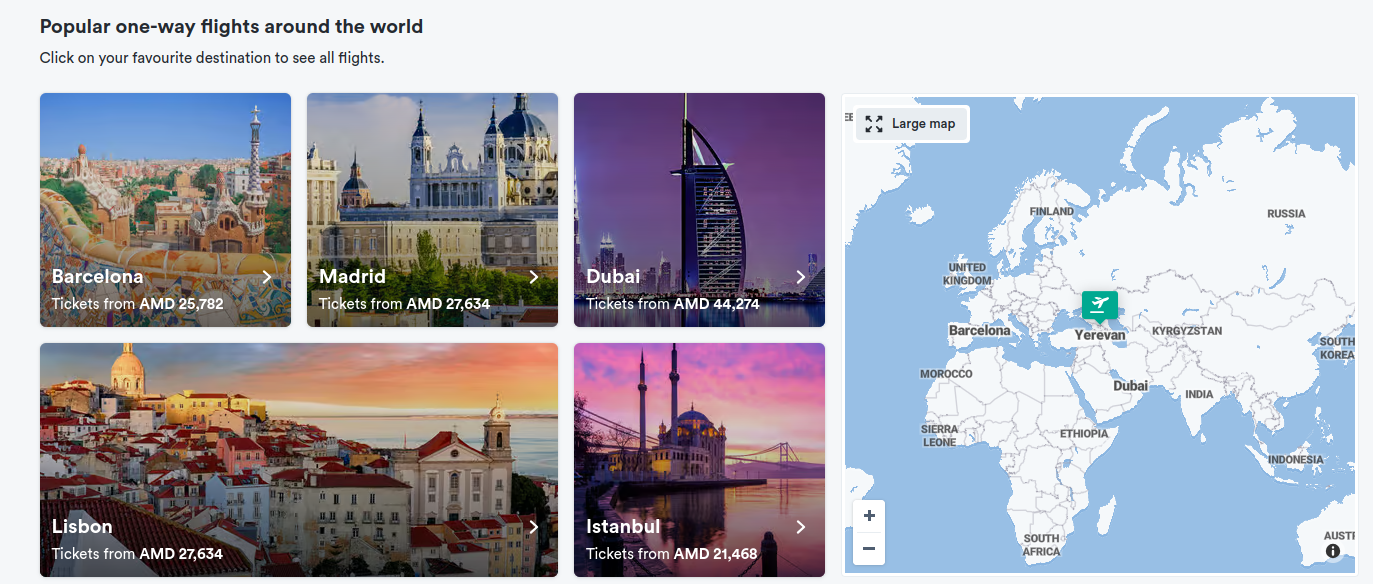

### Kiwi

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
from selenium.webdriver.common.by import By
import csv
import os

In [ ]:
# Works local

# # Initialize WebDriver
# browser = webdriver.Chrome()

# # Create a directory for storing files if it doesn't exist
# output_directory = "March"
# os.makedirs(output_directory, exist_ok=True)

# # Use a set to track visited links to avoid repetition
# visited_links = set()

# # For each day in month
# for day in range(1, 31):
#     print(f"Starting scraping for day {day}...")

#     # Open the website
#     browser.get(f'https://www.kiwi.com/en/search/tiles/yerevan-armenia/anywhere/2025-03-{day}/no-return?stopNumber=1~true')
#     WebDriverWait(browser, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'a[data-test="PictureCard"]')))

#     # Accept cookies if the button appears
#     try:
#         button = WebDriverWait(browser, 20).until(EC.element_to_be_clickable((By.ID, 'cookies_accept')))
#         button.click()
#     except:
#         pass

#     # Collect all city destination links
#     destination_links = browser.find_elements(By.CSS_SELECTOR, 'a[data-test="PictureCard"]')
#     links = [link.get_attribute('href') for link in destination_links]
#     structured_data = set()
#     for link in links:
#         if link not in visited_links:
#             visited_links.add(link)
#             try:
#                 # Reset structured_data for each city
#                 browser.get(link)
#                 WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div[data-test="ResultCardWrapper"]')))

#                 # Click "Load More" until no more data
#                 load_more_clicks = 0

#                 while True:
#                     try:
#                     # Locate and click the "Load More" button
#                     load_more_button = WebDriverWait(browser, 40).until(
#                         EC.element_to_be_clickable((By.XPATH, "//div[text()='Load more']"))
#                     )
#                     ActionChains(browser).move_to_element(load_more_button).perform()
#                     load_more_button.click()
#                     load_more_clicks += 1

#                     # Wait for more elements to load
#                     WebDriverWait(browser, 100).until(
#                 EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'div[data-test="ResultCardWrapper"]'))
#             )
#                     except:
#                         print(f"Clicked 'Load More' {load_more_clicks} times for this url: {link}.")
#                         break

#                 # Scrape flight data
#                 flight_data = browser.find_elements(By.CSS_SELECTOR, 'div[data-test="ResultCardWrapper"]')

#                 for flight in flight_data:
#                     text = flight.text.strip()
#                     if text:
#                         lines = text.split('\n')
#                         stop = lines[1] if len(lines) > 1 else "Unknown"
#                         duration = lines[4] if len(lines) > 4 else "Unknown"
#                         destination = lines[2] if len(lines) > 2 else "Unknown"
#                         price_line = next((line for line in lines if "AMD" in line), None)
#                         if price_line:
#                             price_details = price_line.split()
#                             price = price_details[1] if len(price_details) >= 2 else None
#                             currency = price_details[0] if len(price_details) >= 1 else None
#                         else:
#                             price, currency = None, None

#                         record_key = (destination, price, currency, stop, duration)
#                         structured_data.add(record_key)
#                 print(f"Data Collected for this {destination}")

#                 # Save data for the current city
#                 city_csv_filename = f'{output_directory}/{0 if day < 10 else ""}{day}.csv'
#                 with open(city_csv_filename, 'w', newline='', encoding='utf-8') as file:
#                     writer = csv.writer(file)
#                     writer.writerow(["Flight", "Price", "Currency", "Stop", "Duration"])
#                     for record in structured_data:
#                         writer.writerow(record)

#             except Exception as e:
#                 print(f"Error processing link {link}: {e}")

# browser.quit()
# print("Scraping complete.")

### Rank

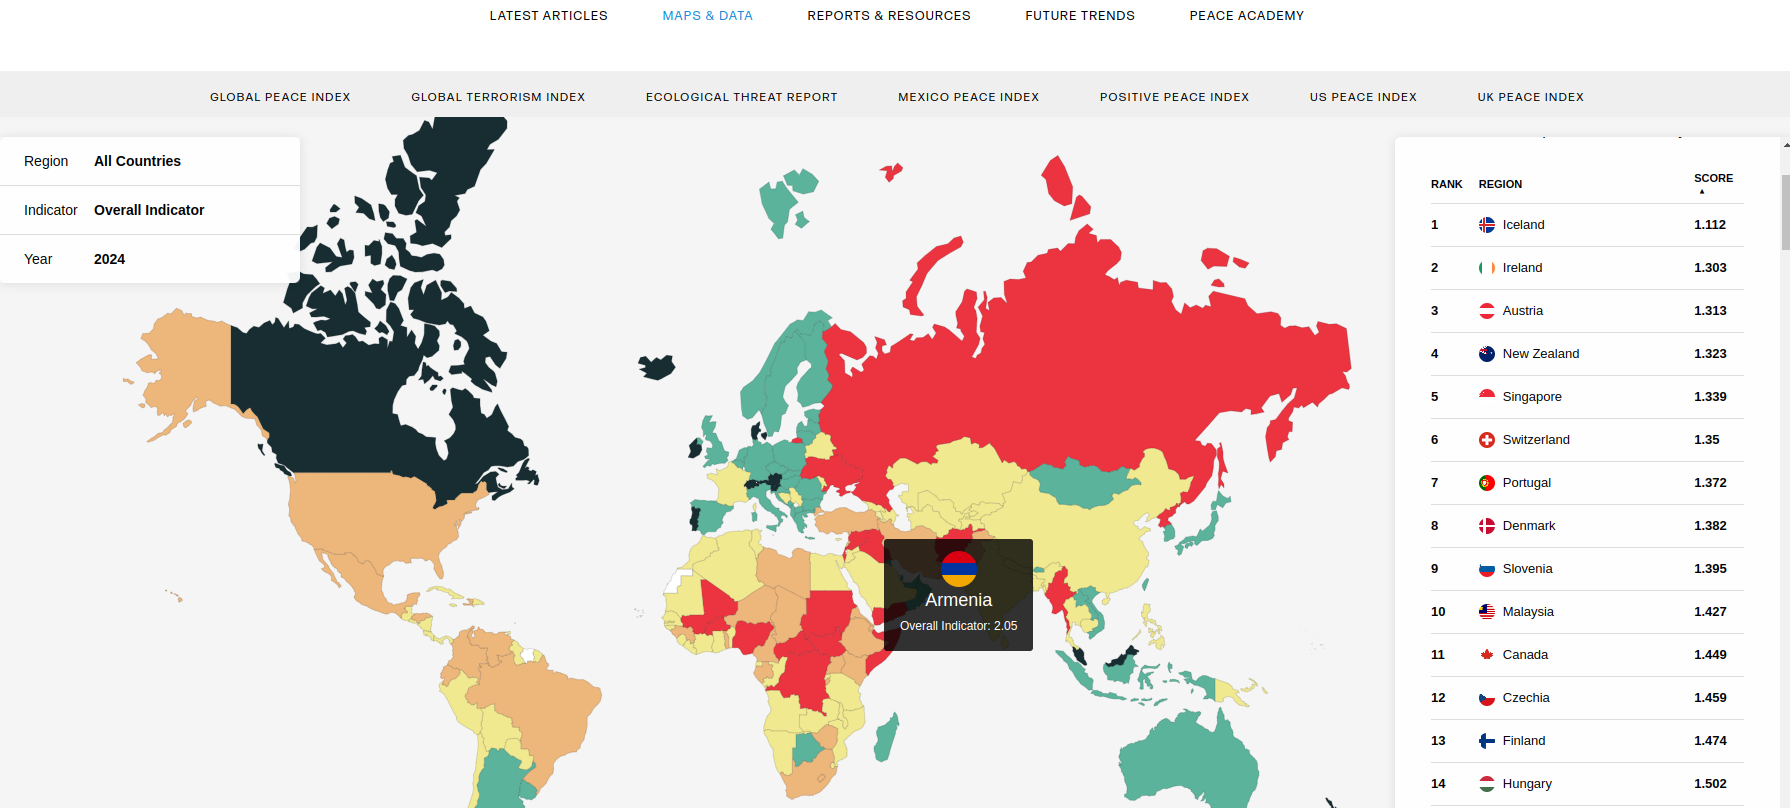

In [ ]:
# Open the website
browser.get('https://www.visionofhumanity.org/maps/#/')
# Wait 5 seconds for loading page
time.sleep(5)

In [ ]:
# scrap regions and score data
regions_list = browser.find_elements(By.CSS_SELECTOR, 'span.bvFtdl')
rank_score_list = browser.find_elements(By.CSS_SELECTOR, 'b')

In [ ]:
# selenium object to text
score_list = [x.text for x in rank_score_list[1::2]]
regions_list = [x.text for x in regions_list]

#close the browser
browser.quit()

## DataFrame Definition

In [ ]:
import pandas as pd
import os

In [ ]:

# folder_path = "/content/drive/MyDrive/Flight/parts"
# csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
# dataframes = []

# # Read each CSV file and append it to the list of dataframes
# for file in csv_files:
#     df = pd.read_csv(file)
#     dataframes.append(df)

# # Concatenate all dataframes into a single dataframe
# union_df = pd.concat(dataframes, ignore_index=True)



In [ ]:
# #February
# folder_path = "/content/drive/MyDrive/Flight/February"
# csv_files = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')])

# dataframes = []
# base_date = pd.Timestamp(year=2025, month=2, day=1)

# # Process each CSV file
# for index, file in enumerate(csv_files):
#     df = pd.read_csv(file)
#     date = base_date + pd.Timedelta(days=index)

#     # Add the date column to the DataFrame
#     df['Date'] = date
#     dataframes.append(df)

# feb = pd.concat(dataframes, ignore_index=True)

In [ ]:
# #March
# folder_path = "/content/drive/MyDrive/Flight/March"
# csv_files = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')])

# dataframes = []
# base_date = pd.Timestamp(year=2025, month=3, day=1)

# # Process each CSV file
# for index, file in enumerate(csv_files):
#     df = pd.read_csv(file)
#     date = base_date + pd.Timedelta(days=index)

#     # Add the date column to the DataFrame
#     df['Date'] = date
#     dataframes.append(df)

# march = pd.concat(dataframes, ignore_index=True)

In [ ]:
# concated = pd.concat([feb, march], ignore_index=True)

# output_path = "/content/drive/MyDrive/Flight/overall.csv"
# concated.to_csv(output_path, index=False)

## Data Cleaning


In [21]:
import pandas as pd

In [22]:
file_id = "1-3nIzQO5exPf7PiIK-3Ex8eItlm6us6Y"

# Construct the direct download URL
url = f"https://drive.google.com/uc?id={file_id}"


# Read directly into a pandas DataFrame
df = pd.read_csv(url)

In [23]:
df

Flight    Price Currency    Stop Duration        Date
0        ATH   45,606      AMD  1 stop  12h 35m  2025-02-01
1        MAD   43,662      AMD  1 stop  15h 40m  2025-02-01
2        NCE  168,587      AMD  1 stop  20h 55m  2025-02-01
3        BCN   69,638      AMD  1 stop  14h 20m  2025-02-01
4        TBS   61,723      AMD  1 stop  20h 45m  2025-02-01
...      ...      ...      ...     ...      ...         ...
24117    TLV   67,709      AMD  1 stop      22h  2025-03-30
24118    MAD   60,858      AMD  1 stop   8h 15m  2025-03-30
24119    ATH   35,267      AMD  1 stop  20h 25m  2025-03-30
24120    BCN  100,700      AMD  1 stop      13h  2025-03-30
24121    BCN  113,310      AMD  1 stop   9h 25m  2025-03-30

[24122 rows x 6 columns]

In [24]:
df['Flight'].unique()

array(['ATH', 'MAD', 'NCE', 'BCN', 'TBS', 'SSH', 'BEG', 'AUH', 'VIE',
       'SOF', 'CRL', 'PRG', 'TLV', 'BER', 'AMS', 'FRA', 'HHN', 'LCA',
       'BUD', 'BKK', 'DXB', 'DUS', 'TGD', 'DTM', 'VLC', 'BUS', 'BRU',
       'LYS', 'VCE', 'RMO', 'SAW', 'WMI', 'WAW', 'IST', 'SHJ', 'TSF',
       'TIV', 'HKT', 'DWC', 'LIS', 'SKG'], dtype=object)

In [25]:
#generated by gpt
airport_mapping = {
    'BCN': {'city': 'Barcelona', 'country': 'Spain'},
    'TLV': {'city': 'Tel Aviv', 'country': 'Israel'},
    'ATH': {'city': 'Athens', 'country': 'Greece'},
    'FRA': {'city': 'Frankfurt', 'country': 'Germany'},
    'LYS': {'city': 'Lyon', 'country': 'France'},
    'NCE': {'city': 'Nice', 'country': 'France'},
    'CRL': {'city': 'Charleroi', 'country': 'Belgium'},
    'BKK': {'city': 'Bangkok', 'country': 'Thailand'},
    'BRU': {'city': 'Brussels', 'country': 'Belgium'},
    'BEG': {'city': 'Belgrade', 'country': 'Serbia'},
    'SSH': {'city': 'Sharm El Sheikh', 'country': 'Egypt'},
    'AUH': {'city': 'Abu Dhabi', 'country': 'United Arab Emirates'},
    'TBS': {'city': 'Tbilisi', 'country': 'Georgia'},
    'MAD': {'city': 'Madrid', 'country': 'Spain'},
    'DUS': {'city': 'Düsseldorf', 'country': 'Germany'},
    'VCE': {'city': 'Venice', 'country': 'Italy'},
    'LCA': {'city': 'Larnaca', 'country': 'Cyprus'},
    'BUD': {'city': 'Budapest', 'country': 'Hungary'},
    'SOF': {'city': 'Sofia', 'country': 'Bulgaria'},
    'VLC': {'city': 'Valencia', 'country': 'Spain'},
    'HKT': {'city': 'Phuket', 'country': 'Thailand'},
    'AMS': {'city': 'Amsterdam', 'country': 'Netherlands'},
    'WAW': {'city': 'Warsaw', 'country': 'Poland'},
    'PRG': {'city': 'Prague', 'country': 'Czechia'},
    'RMO': {'city': 'Rome', 'country': 'Italy'},
    'VIE': {'city': 'Vienna', 'country': 'Austria'},
    'DXB': {'city': 'Dubai', 'country': 'United Arab Emirates'},
    'DTM': {'city': 'Dortmund', 'country': 'Germany'},
    'SHJ': {'city': 'Sharjah', 'country': 'United Arab Emirates'},
    'TGD': {'city': 'Podgorica', 'country': 'Montenegro'},
    'HHN': {'city': 'Frankfurt-Hahn', 'country': 'Germany'},
    'SAW': {'city': 'Istanbul', 'country': 'Turkiye'},
    'BER': {'city': 'Berlin', 'country': 'Germany'},
    'TSF': {'city': 'Treviso', 'country': 'Italy'},
    'IST': {'city': 'Istanbul', 'country': 'Turkiye'},
    'WMI': {'city': 'Warsaw Modlin', 'country': 'Poland'},
    'BUS': {'city': 'Batumi', 'country': 'Georgia'},
    'DWC': {'city': 'Dubai', 'country': 'United Arab Emirates'},
    'TIV': {'city': 'Tivat', 'country': 'Montenegro'},
    'LIS': {'city': 'Lisbon', 'country': 'Portugal'},
    'SKG': {'city': 'Thessaloniki', 'country': 'Greece'}
}


In [26]:
city_mapping = {key: value['city'] for key, value in airport_mapping.items()}
country_mapping = {key: value['country'] for key, value in airport_mapping.items()}

# Map the 'Flight' column directly to new 'City' and 'Country' columns
df['City'] = df['Flight'].map(city_mapping).fillna('Unknown')
df['Country'] = df['Flight'].map(country_mapping).fillna('Unknown')

In [27]:
 df["Currency"].unique()

array(['AMD'], dtype=object)

In [28]:
df.drop(["Flight", "Currency"], axis=1, inplace=True)

In [29]:
rank_id = "14My69LuInC-0EwSQtN76fE6dbufO7wqJ"

# Construct the direct download URL
url = f"https://drive.google.com/uc?id={rank_id}"

# Read directly into a pandas DataFrame
ranks = pd.read_csv(url)

In [30]:
ranks

Country  Score
0        Iceland  1.112
1        Ireland  1.303
2        Austria  1.313
3    New Zealand  1.323
4      Singapore  1.339
..           ...    ...
158      Ukraine  3.280
159  Afghanistan  3.294
160  South Sudan  3.324
161        Sudan  3.327
162        Yemen  3.397

[163 rows x 2 columns]

In [31]:
df = pd.merge(df, ranks, on="Country", how="left")
df["Score"] = df["Score"].astype(float)

In [32]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.day_name()

In [34]:
def duration_to_minutes(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
        if 'm' in duration:
            minutes = int(duration.split('h')[1].replace('m', '').strip())
    elif 'm' in duration:  # Case where only minutes are present
        minutes = int(duration.replace('m', '').strip())
    return hours * 60 + minutes

df['Duration'] = df['Duration'].apply(duration_to_minutes)

In [35]:
df.dtypes

Price                 float64
Stop                   object
Duration                int64
Date           datetime64[ns]
City                   object
Country                object
Score                 float64
day_of_week            object
dtype: object

In [36]:
df.isnull().sum()

Price          0
Stop           0
Duration       0
Date           0
City           0
Country        0
Score          0
day_of_week    0
dtype: int64

# **Data Visualization**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
df

Price    Stop Duration       Date       City  Country  Score
0       45,606  1 stop  12h 35m 2025-02-01     Athens   Greece  1.793
1       43,662  1 stop  15h 40m 2025-02-01     Madrid    Spain  1.597
2      168,587  1 stop  20h 55m 2025-02-01       Nice   France  2.088
3       69,638  1 stop  14h 20m 2025-02-01  Barcelona    Spain  1.597
4       61,723  1 stop  20h 45m 2025-02-01    Tbilisi  Georgia  2.195
...        ...     ...      ...        ...        ...      ...    ...
24117   67,709  1 stop      22h 2025-03-30   Tel Aviv   Israel  3.115
24118   60,858  1 stop   8h 15m 2025-03-30     Madrid    Spain  1.597
24119   35,267  1 stop  20h 25m 2025-03-30     Athens   Greece  1.793
24120  100,700  1 stop      13h 2025-03-30  Barcelona    Spain  1.597
24121  113,310  1 stop   9h 25m 2025-03-30  Barcelona    Spain  1.597

[24122 rows x 7 columns]

5 Cheapest Flights Differing by City:
         Price    Stop  Duration       Date      City   Country  Score  \
6623   11751.0  Direct       265 2025-02-27    Venice     Italy  1.692   
922    11751.0  Direct       175 2025-02-04     Sofia  Bulgaria  1.629   
11039  11893.0  Direct       240 2025-03-07    Vienna   Austria  1.313   
21401  12524.0  1 stop       675 2025-03-26  Dortmund   Germany  1.542   
21953  14803.0  Direct       150 2025-03-27  Istanbul   Turkiye  2.780   

      day_of_week  
6623     Thursday  
922       Tuesday  
11039      Friday  
21401   Wednesday  
21953    Thursday  


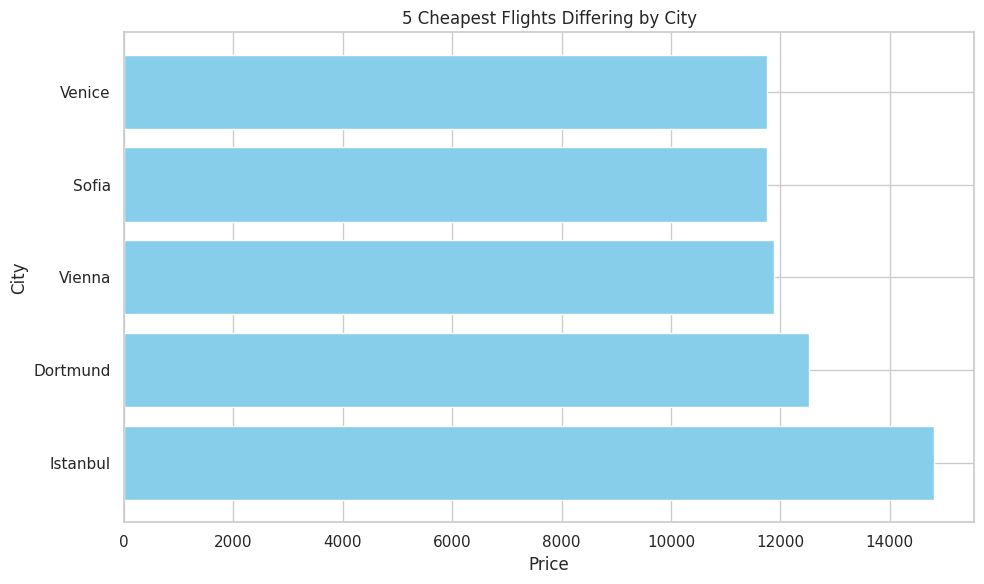

In [ ]:
# Sort by price and keep only one flight per city
cheapest_flights_by_city = df.sort_values('Price').drop_duplicates('City').head(5)

# Display the result
print("5 Cheapest Flights Differing by City:")
print(cheapest_flights_by_city)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(cheapest_flights_by_city['City'], cheapest_flights_by_city['Price'], color='skyblue')
plt.xlabel('Price')
plt.ylabel('City')
plt.title('5 Cheapest Flights Differing by City')
plt.gca().invert_yaxis()  # Invert y-axis to have the cheapest at the top
plt.tight_layout()
plt.show()


5 The Most Expensive Flights Differing by City:
          Price    Stop  Duration       Date     City               Country  \
1543    46524.0  Direct       175 2025-02-06  Sharjah  United Arab Emirates   
15923   49821.0  1 stop       950 2025-03-17    Dubai  United Arab Emirates   
8191    57601.0  1 stop      1350 2025-03-02    Tivat            Montenegro   
16026  140916.0  1 stop      1210 2025-03-17   Phuket              Thailand   
9628   140923.0  1 stop      1530 2025-03-04  Bangkok              Thailand   

       Score day_of_week  
1543   1.897    Thursday  
15923  1.897      Monday  
8191   1.746      Sunday  
16026  2.048      Monday  
9628   2.048     Tuesday  


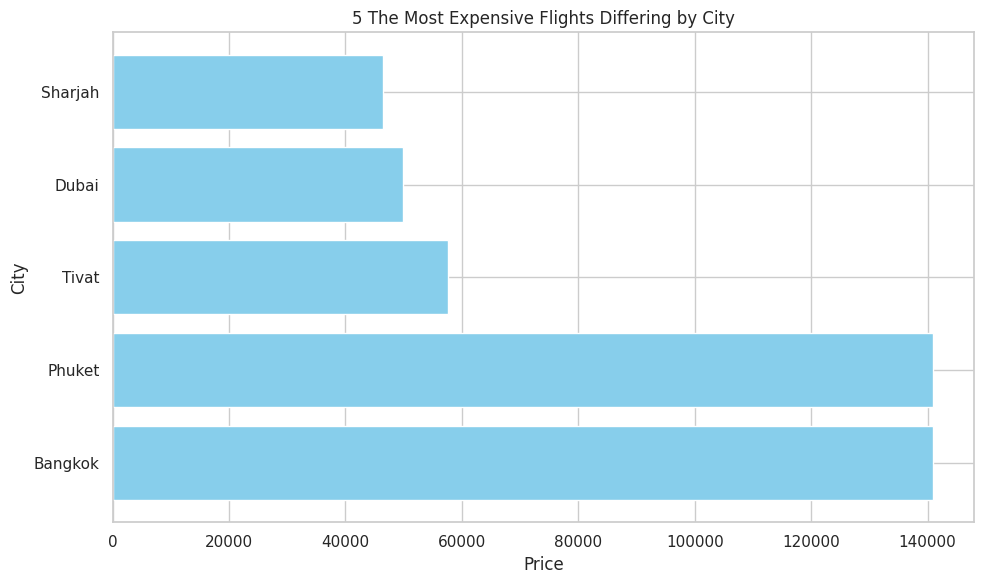

In [ ]:
# Sort by price and keep only one flight per city
expensive_flights_by_city = df.sort_values('Price').drop_duplicates('City').tail(5)

# Display the result
print("5 The Most Expensive Flights Differing by City:")
print(expensive_flights_by_city)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(expensive_flights_by_city['City'], expensive_flights_by_city['Price'], color='skyblue')
plt.xlabel('Price')
plt.ylabel('City')
plt.title('5 The Most Expensive Flights Differing by City')
plt.gca().invert_yaxis()  # Invert y-axis to have the cheapest at the top
plt.tight_layout()
plt.show()


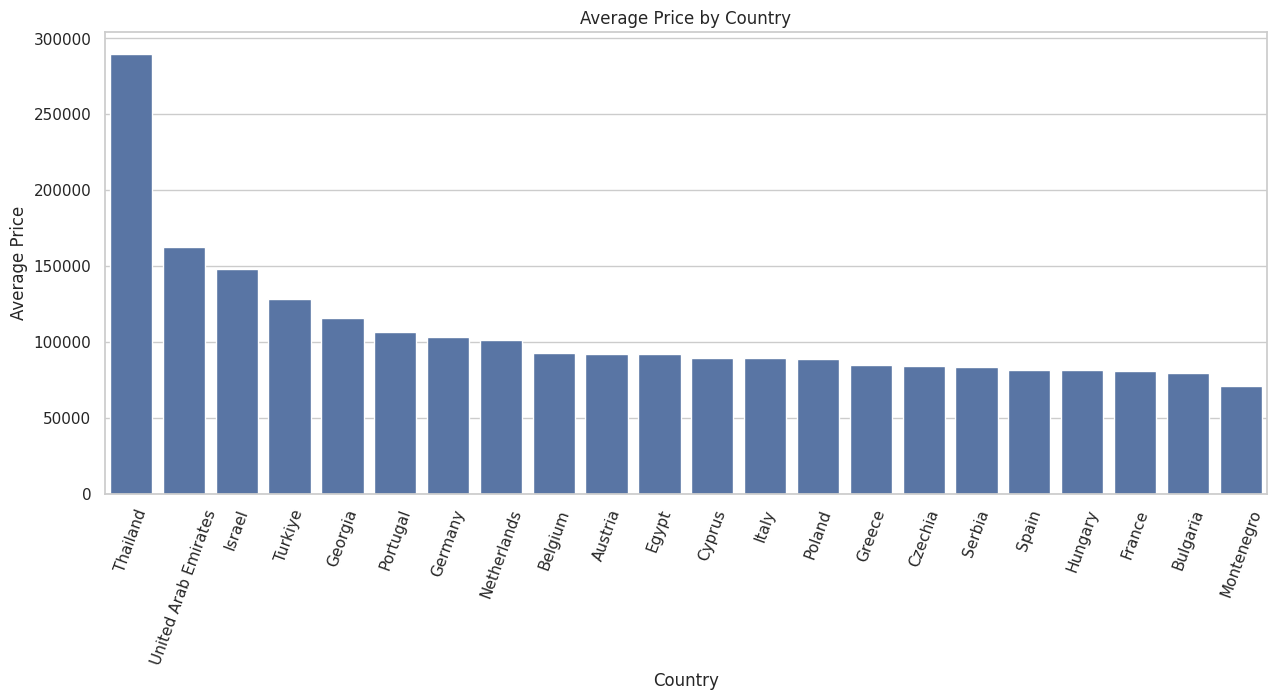

In [ ]:
#  Average Price by Country
avg_price_city = df.groupby('Country')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values)
plt.title('Average Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.xticks(rotation=70)
plt.show()

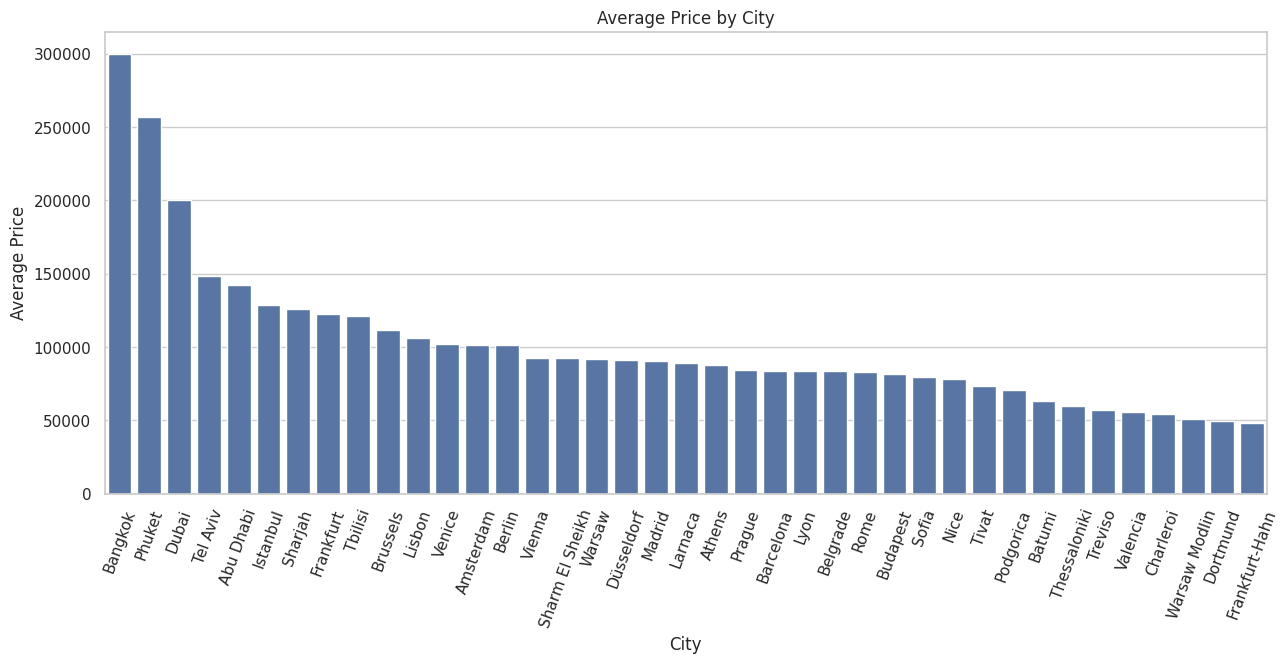

In [ ]:
#  Average Price by City
avg_price_city = df.groupby('City')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values)
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=70)
plt.show()

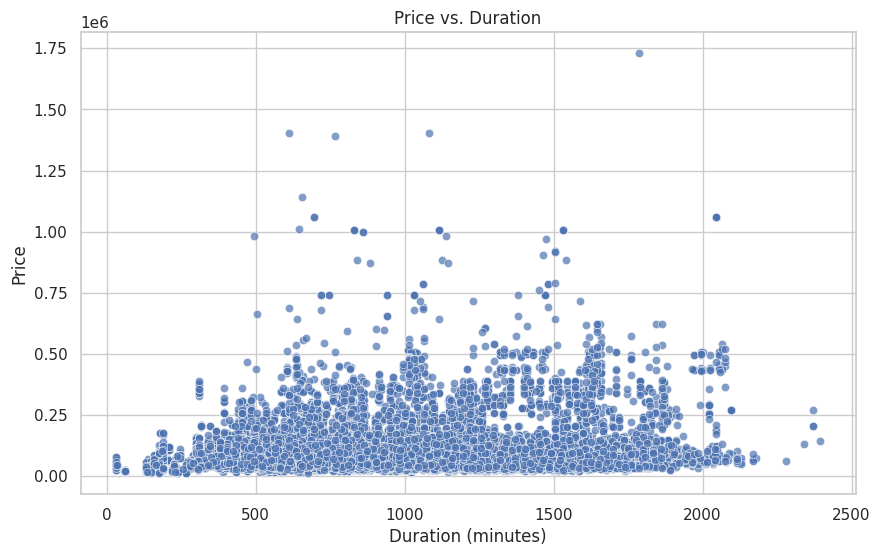

In [ ]:
# Price vs. Duration Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Price', data=df, alpha=0.7)
plt.title('Price vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()

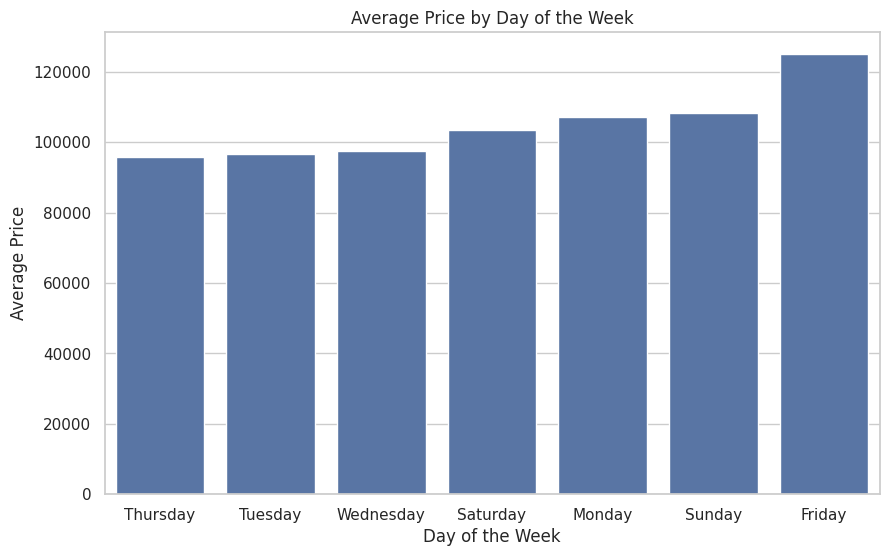

In [ ]:
# Average Price by Day of the Week
avg_price_day = df.groupby('day_of_week')['Price'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_day.index, y=avg_price_day.values)
plt.title('Average Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.show()

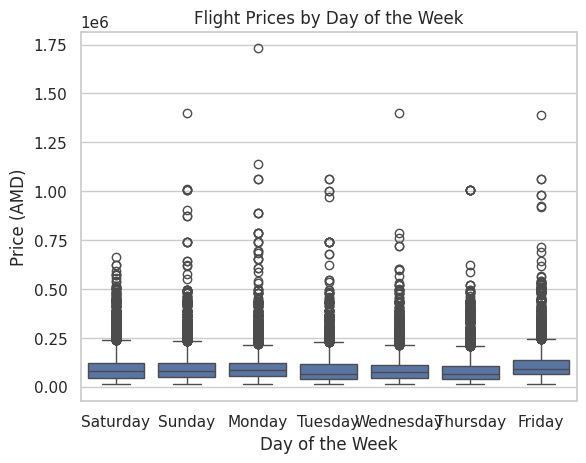

In [ ]:
# Flight Prices by Day of the Week

sns.boxplot(data=df, x='day_of_week', y='Price')
plt.title('Flight Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Price (AMD)')
plt.show()

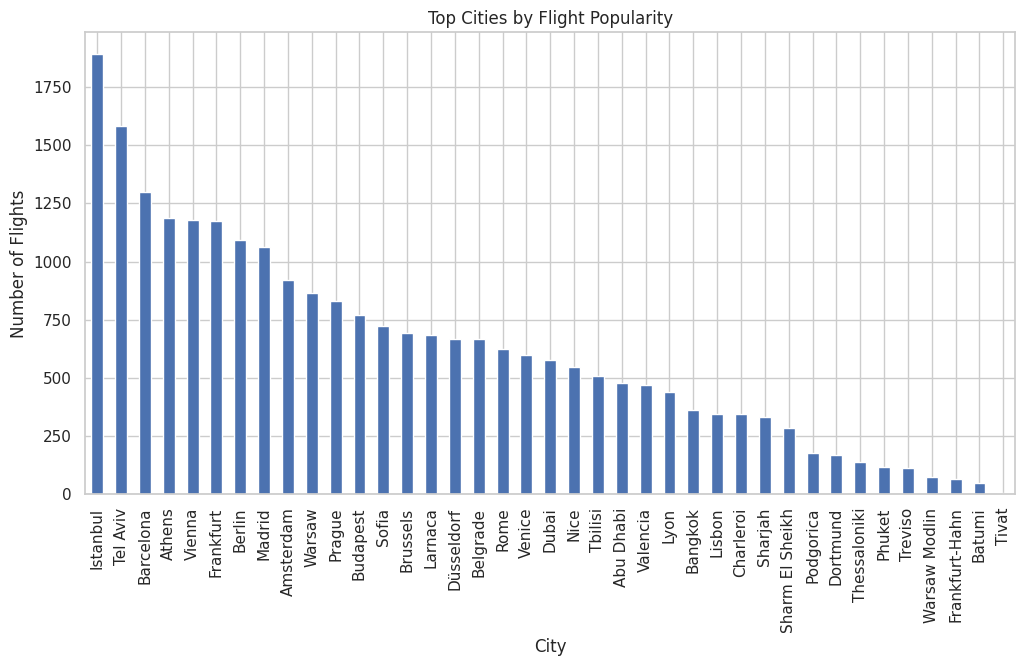

In [ ]:
#  Top Cities by Flight Popularity

city_counts = df['City'].value_counts()
city_counts.plot(kind='bar', figsize=(12, 6), title='Top Cities by Flight Popularity')
plt.xlabel('City')
plt.ylabel('Number of Flights')
plt.show()

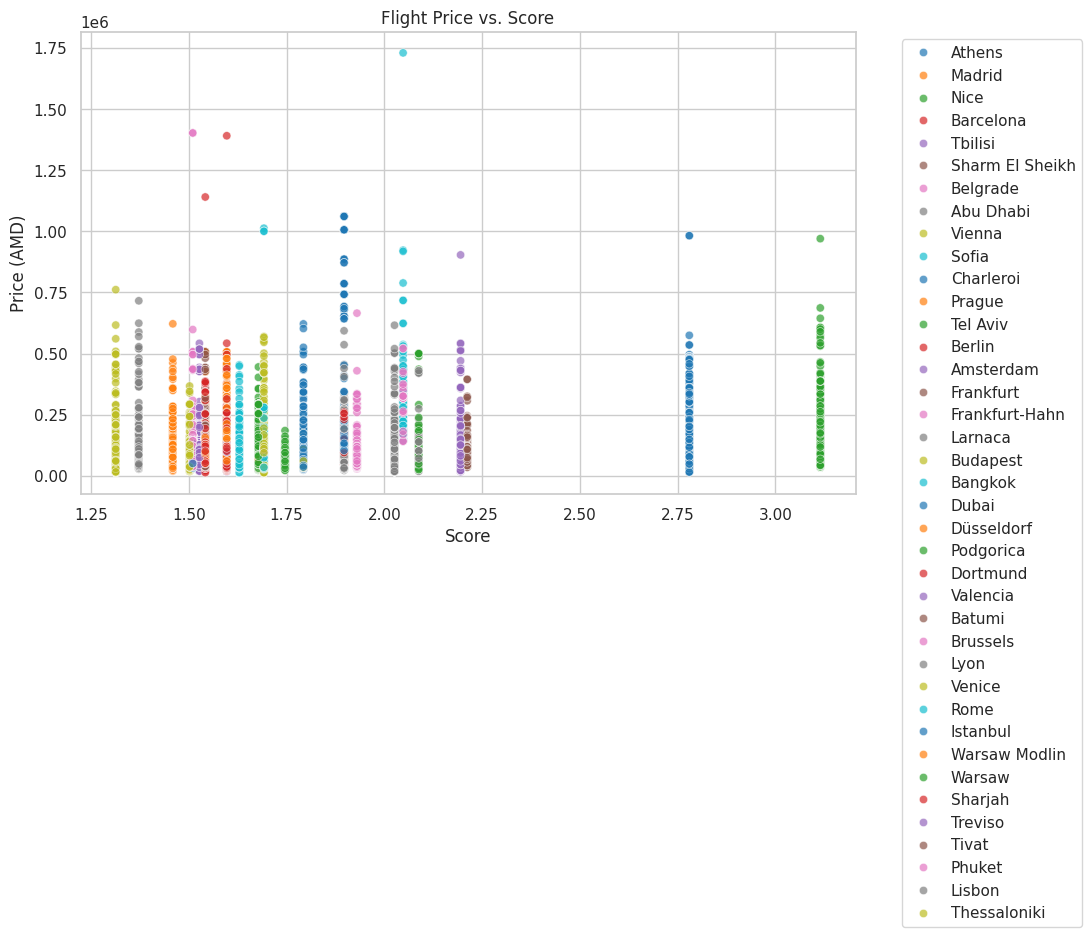

In [ ]:
# Score Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Score', y='Price', hue='City', palette='tab10', alpha=0.7)
plt.title('Flight Price vs. Score')
plt.xlabel('Score')
plt.ylabel('Price (AMD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

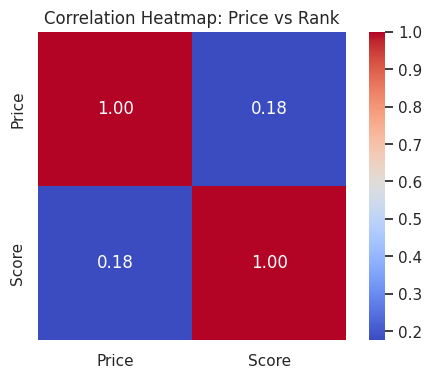

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[['Price', 'Score']].corr(method='pearson')  # Use 'spearman' if needed

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap: Price vs Rank')
plt.show()

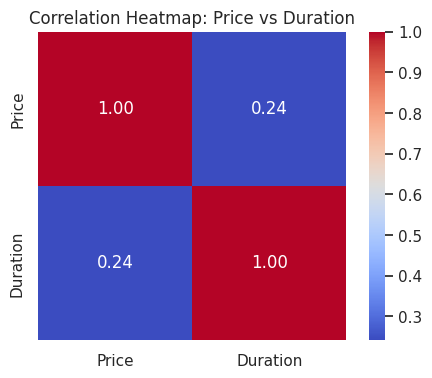

In [40]:
# Compute the correlation matrix
correlation_matrix = df[['Price', 'Duration']].corr(method='pearson')  # Use 'spearman' if needed

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap: Price vs Duration')
plt.show()

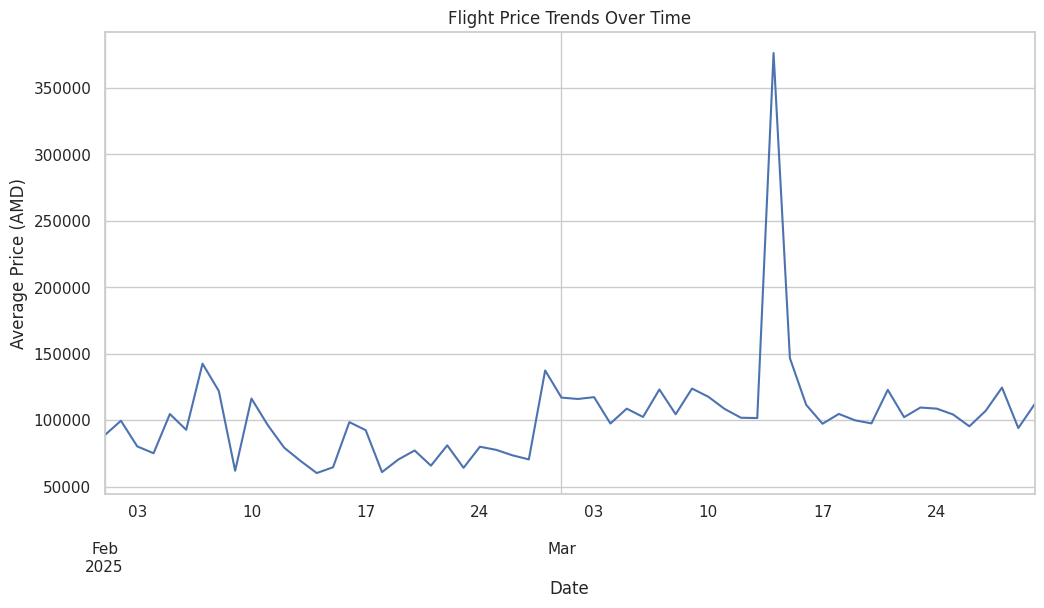

In [ ]:
#Flight Price Trends Over Time
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
avg_price_date = df.groupby('Date')['Price'].mean()
avg_price_date.plot(kind='line', figsize=(12, 6), title='Flight Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (AMD)')
plt.show()

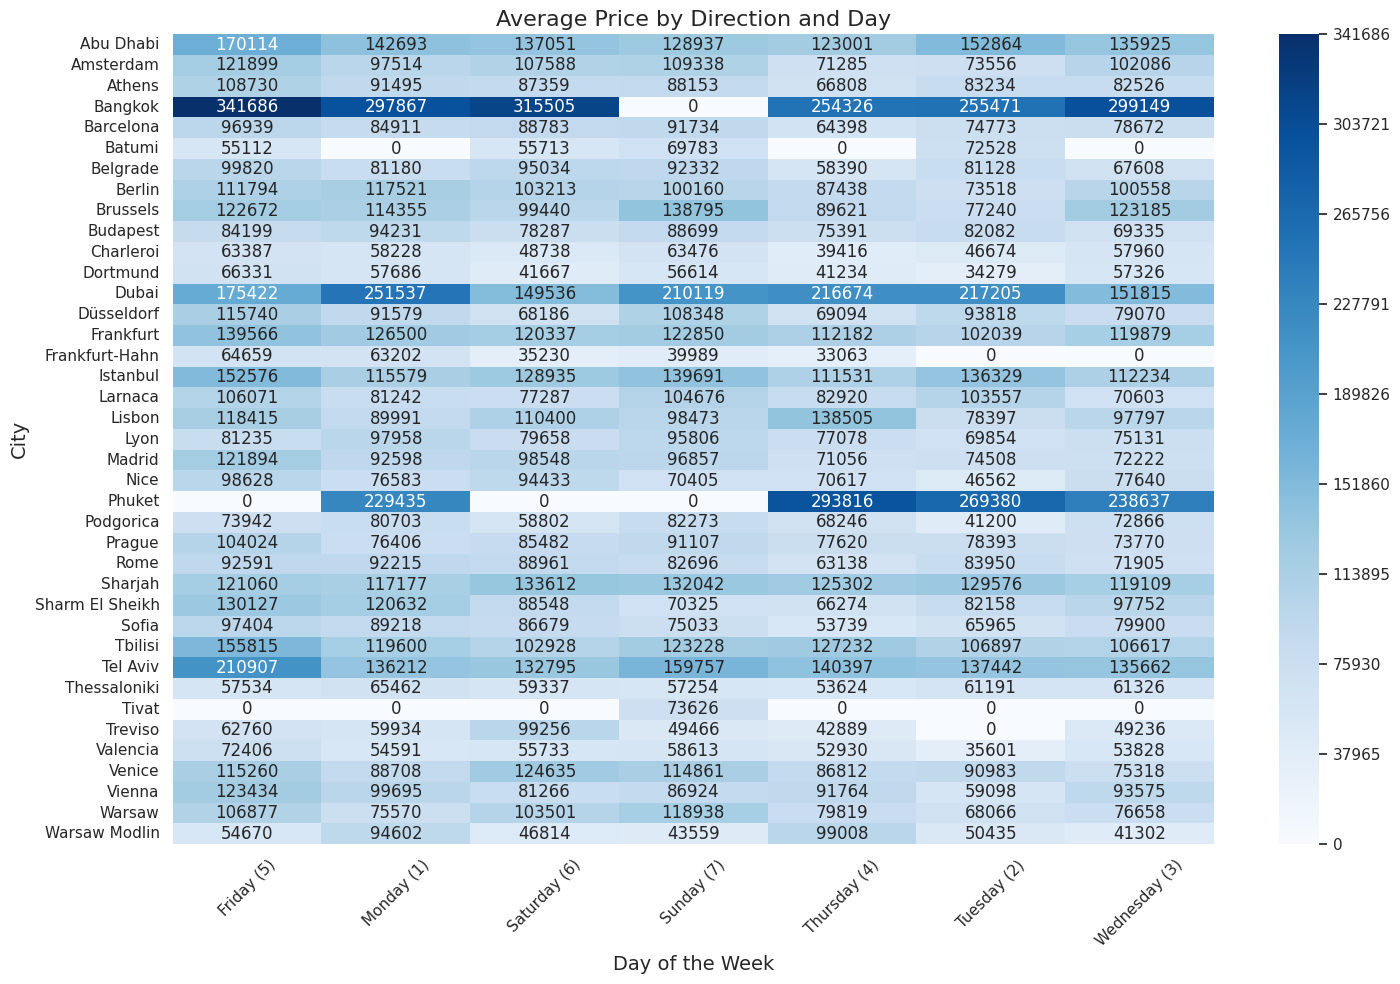

In [42]:
# Map day of the week to integers
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['day_of_week_int'] = df['day_of_week'].apply(lambda x: day_map[x])

# Create the pivot table
x_3 = df.pivot_table('Price', index='City', columns='day_of_week', aggfunc='mean')
x_3 = x_3.fillna(0).astype(int)

# Generate weeks_list combining day names and numbers
weeks_list = [f"{day} ({day_map[day]})" for day in x_3.columns]

# Create the heatmap
fig, ax = plt.subplots(figsize=(15, 10))  # Adjusted figure size

sns.heatmap(
    x_3,
    cmap='Blues',
    annot=True,
    fmt='.0f',
    cbar_kws={'ticks': np.linspace(0, x_3.max().max(), 10)},
    ax=ax
)

# Customize the x-axis labels and rotation
ax.set_xticklabels(weeks_list, rotation=45)

# Add title and labels
ax.set_title('Average Price by Direction and Day', fontsize=16)
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('City', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

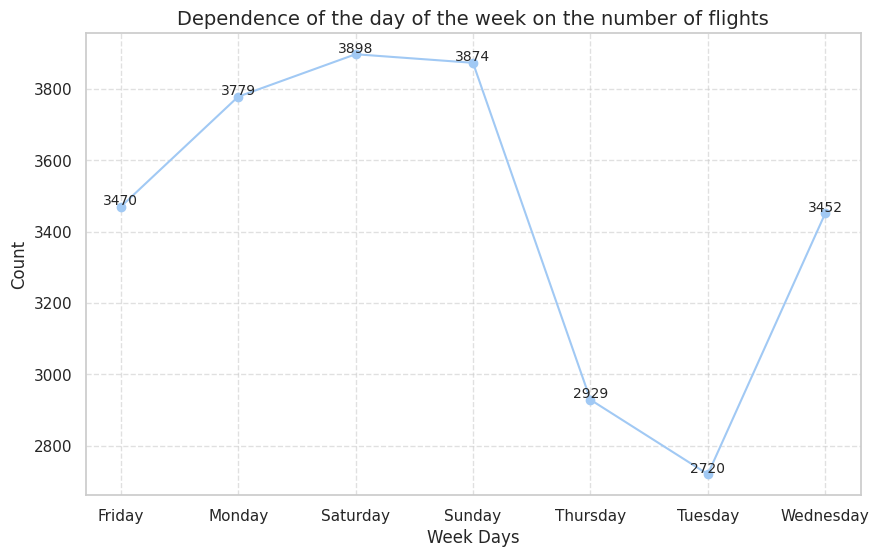

In [ ]:
flight_counts = df['day_of_week'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(flight_counts.index, flight_counts.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Dependence of the day of the week on the number of flights', fontsize=14)
plt.xlabel('Week Days', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the counts on the plot
for i, value in enumerate(flight_counts.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

# Show the grid and plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

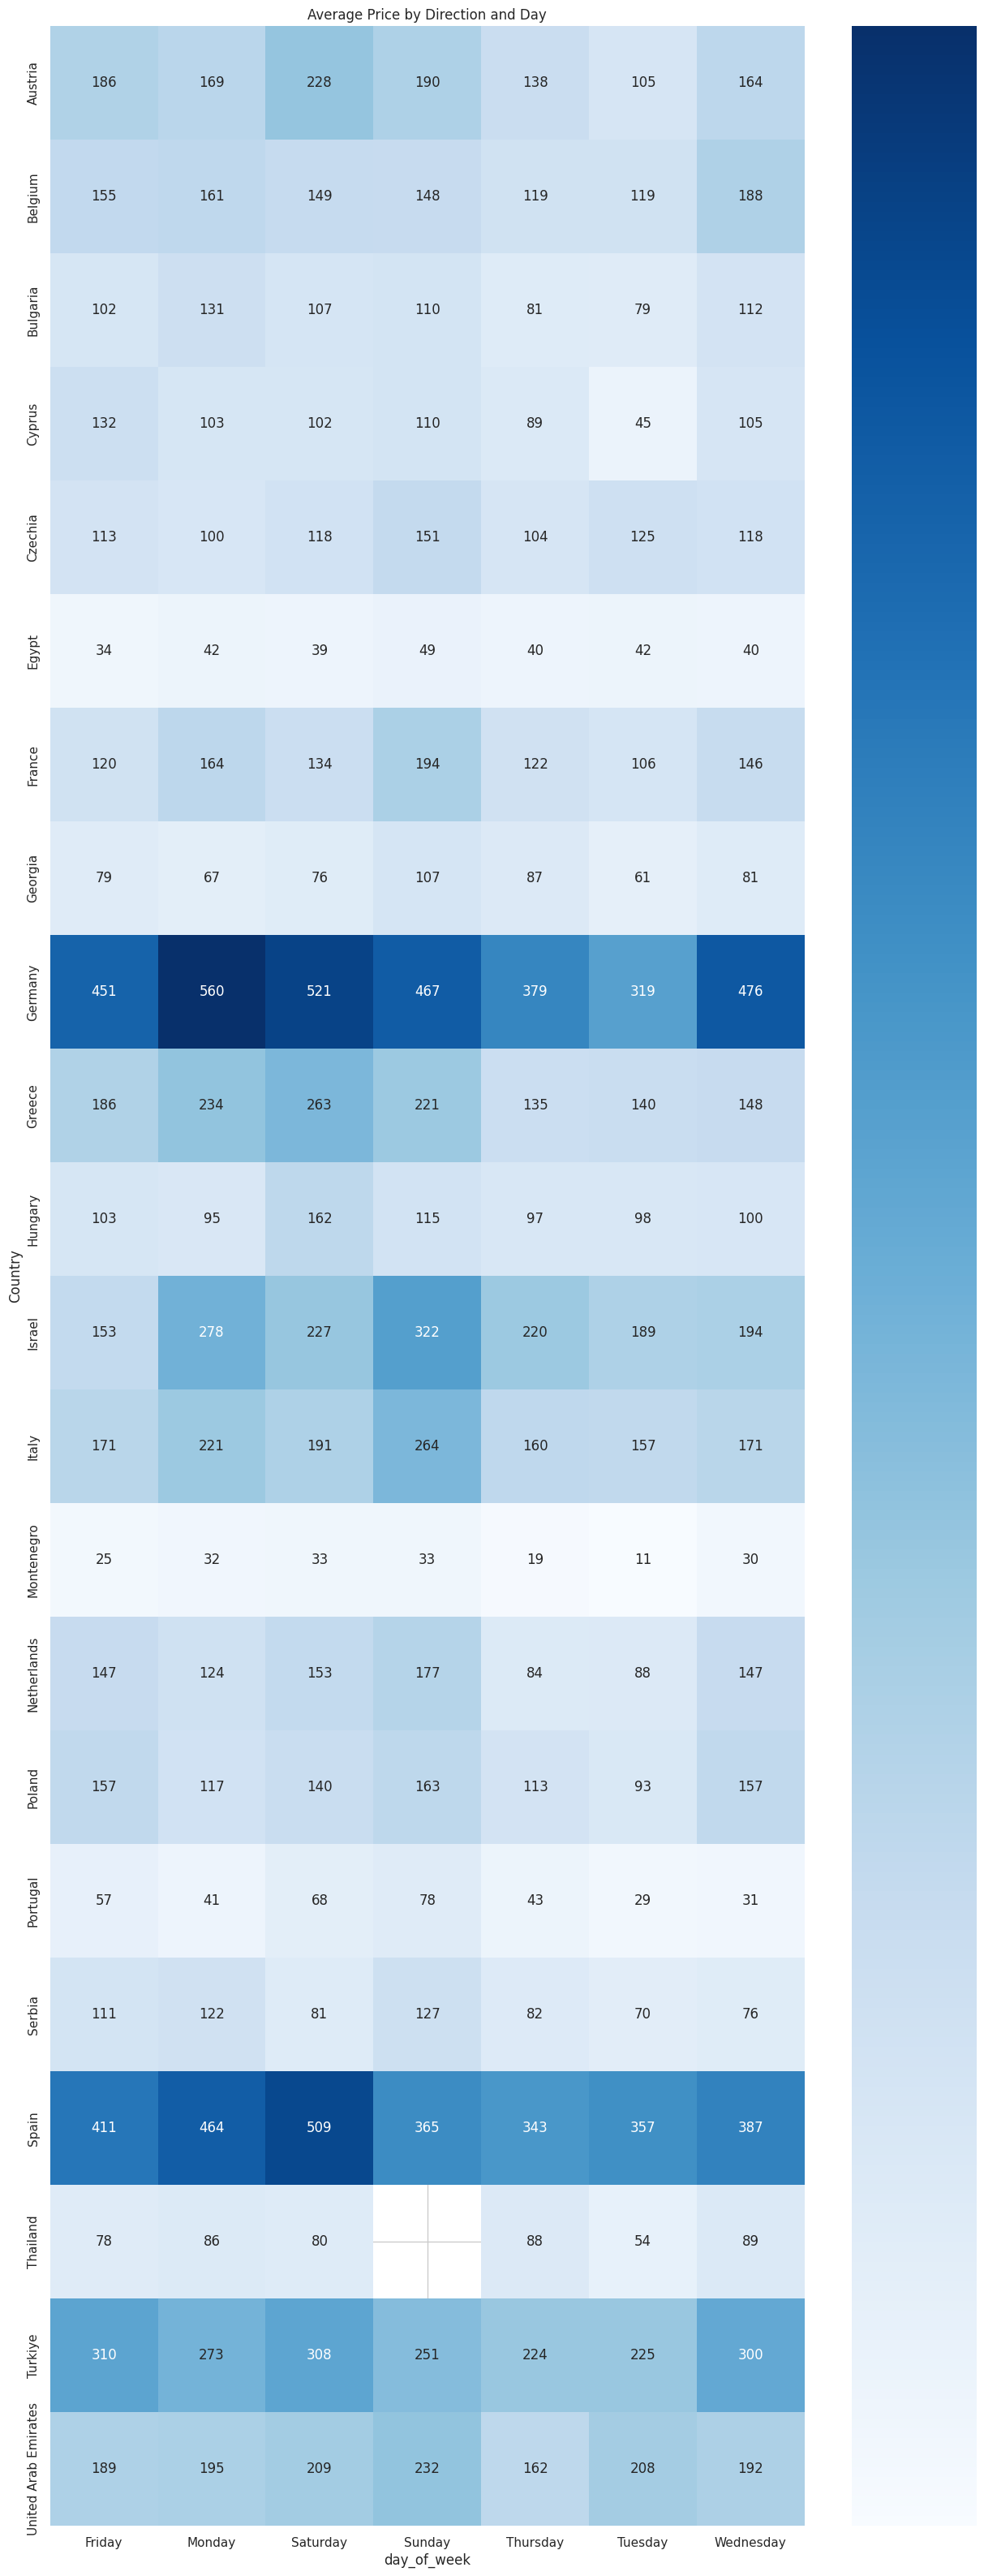

In [ ]:
import seaborn as sns
df.Date = pd.to_datetime(df.Date)
# specify the bin edges as dates
bin_edges = [pd.to_datetime('2023-01-10'), pd.to_datetime('2023-01-16'), pd.to_datetime('2023-01-23'), pd.to_datetime('2023-01-30'),
             pd.to_datetime('2023-02-06'), pd.to_datetime('2023-02-13'), pd.to_datetime('2023-02-20'), pd.to_datetime('2023-02-27'),
             pd.to_datetime('2023-03-06'), pd.to_datetime('2023-03-13'), pd.to_datetime('2023-03-20'), pd.to_datetime('2023-03-27'),
             pd.to_datetime('2023-04-01')]

# specify the labels for each bin
bin_labels = [x for x in range(1, 13)]
# cut the 'date' column into bins
df['Which week'] = pd.cut(df['Date'], bins=bin_edges,labels=bin_labels, right=False)

x_3 = df.pivot_table('City', index='Country', columns='day_of_week', aggfunc='count')

# create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 40))

# create a heatmap plot using seaborn
sns.heatmap(x_3, cmap='Blues', annot=True, fmt='.0f', cbar_kws={'ticks': np.linspace(0, 700000, 36)}, ax=ax)

# set the plot title
ax.set_title('Average Price by Direction and Day')

# show the plot
plt.show()


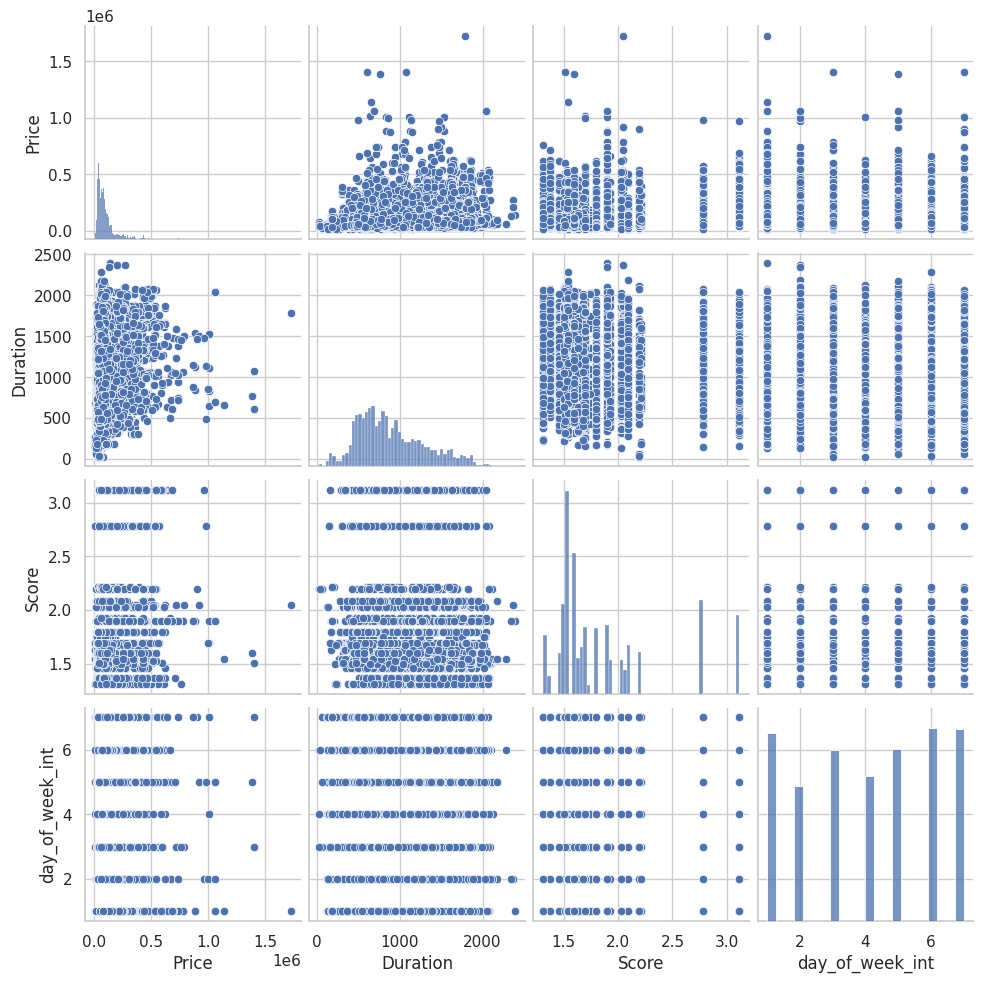

In [ ]:
sns.pairplot(df)